# Breast cancer percent metastases prediction
- aim of the project  is To design models that predict breast cancer metastases ratio in digital histopathology images of lymph node sections.
- data consists of 1399 images and a csv file with the image id and labels.

## data preprocessing:
- loading images
- checking size and shape
- spliting the data
- scaling the data

In [ ]:
import csv

In [2]:
image_id=[]
output=[]
with open("train.csv","r") as file:
    data=csv.reader(file)
    for column in data:
        image_id.append(column[0])
        output.append(column[1])
    

In [3]:
import cv2

In [4]:
images=[]
for imageId in image_id:
    img=cv2.imread(fr"C:\Users\aya\Downloads\images\{imageId}.jpeg")
    img=cv2.resize(img,(200,200))
    images.append(img)
len(images)

1399

In [5]:
import numpy as np

In [6]:
images=np.array(images)
output=np.array(output)

In [7]:
images.shape

(1399, 200, 200, 3)

In [8]:
c_images=images.reshape(len(images),-1)
c_images.shape

(1399, 120000)

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
c_train,c_test,o_train,o_test=train_test_split(c_images,output,random_state=10,test_size=.20)

In [13]:
c_train.shape,c_test.shape

((1119, 120000), (280, 120000))

In [14]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
c_train = sc.fit_transform(c_train)
c_test = sc.transform(c_test)


## model selection and evaluation
- fit the model to svc with probability true to get the probability of cancer.svc gave higher accuracy after trying multiple models.
- AUROC cuve and score metric were used for evaluation.


In [15]:
from sklearn.svm  import SVC

In [ ]:
sv=SVC(probability=True)
sv.fit(c_train,o_train)

In [47]:
o_test=[int(i) for i in o_test]
o_train=[int(i) for i in o_train]
print(sv.score(c_train,o_train))
print(sv.score(c_test,o_test))


1.0
0.11719525670675268


In [50]:
prob=sv.predict_proba(c_test)

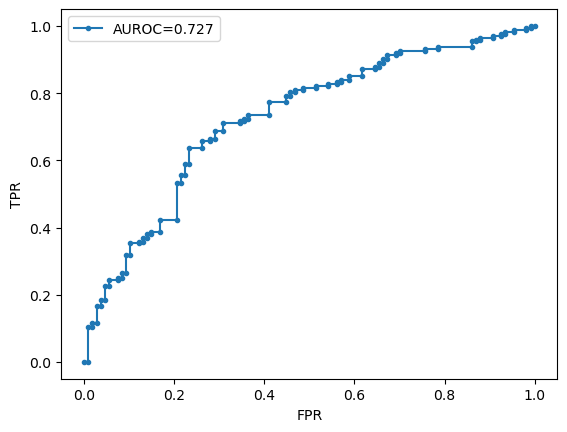

In [51]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(o_test,prob)
fpr,tpr,_=roc_curve(o_test,prob)
plt.plot(fpr,tpr,marker=".",label='AUROC=%0.3f'%auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()



## prepairing test data for kaggle

In [82]:
image_T=[]
with open("test.csv","r") as file:
    data=csv.reader(file)
    for column in data:
        image_T.append(column[0]) 

In [83]:
cancerT=[]
for imageId in image_T:
    img=cv2.imread(fr"C:\Users\aya\Downloads\images\{imageId}.jpeg")
    img=cv2.resize(img,(200,200))
    cancerT.append(img)


In [84]:
cancerT=np.array(cancerT)
cancerT=cancerT.reshape(len(cancerT),-1)
cancerT = sc.transform(cancerT)


In [85]:
prediction=sv.predict_proba(cancerT)[:,1]

In [86]:
with open('AUROC.csv','w+') as file:
    myfile=csv.writer(file)
    myfile.writerow(['img_id','cancer_score'])
    for i in range(len(image_T)):
        myfile.writerow([image_T[i],prediction[i]])

## kaggle results
- evaluation metric MAE

![kaggle MAE results](kaggle_res.png)